In [1]:
import voltron 
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import pandas as pd

import argparse
import datetime
import gpytorch
from voltron.train_utils import LearnGPCV, TrainVolModel
from voltron.models import VoltMagpie

import copy

sns.set_style('white')
# style.use('whitegrid')
palette = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
sns.set(palette = palette, font_scale=2.0, style="white", rc={"lines.linewidth": 2.0})

Warning no robinhood utils.


In [2]:
dpath = "/home/greg_b/DATA/autoformer/exchange_rate/exchange_rate.csv"
dat = pd.read_csv(dpath)
dat = dat.drop(['4', '5'], 1)

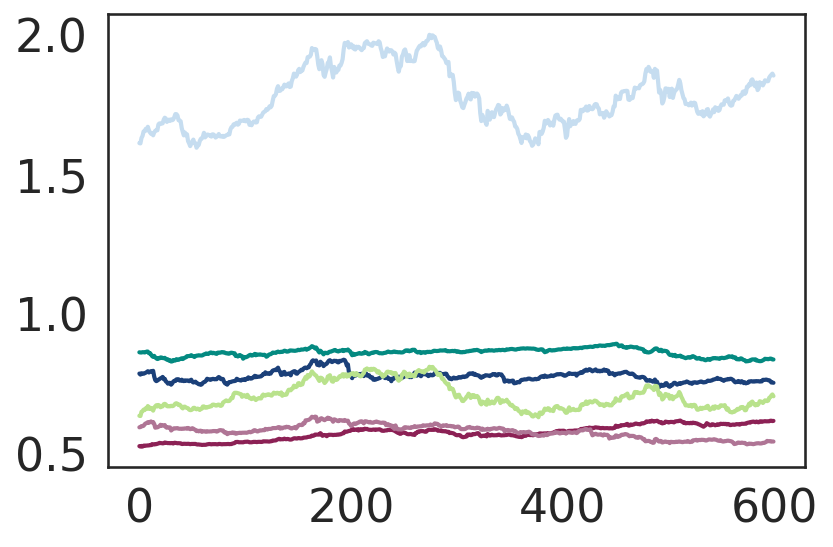

In [3]:
plt.figure(dpi=150)
plt.plot(dat.iloc[:600, 1:]);
# plt.axvline(0.8 * dat.shape[0])


In [4]:
dat_idx = 2
ntrain = 500
ntest = 150
nstart = 0
ys = dat.iloc[nstart:, dat_idx].to_numpy()

train_x = torch.arange(ntrain-1).float()/365
train_y = torch.FloatTensor(ys[:ntrain])
test_x = torch.arange(ntrain, ntrain + ntest).float()/365
test_y = torch.FloatTensor(ys[ntrain:ntrain+ntest])

# if torch.cuda.is_available():
#     use_cuda = True,
#     train_x, train_y = train_x.cuda(), train_y.cuda()
#     test_x, test_y = test_x.cuda(), test_y.cuda()

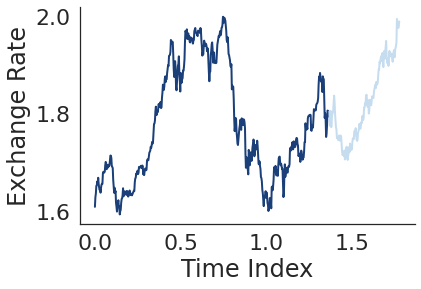

In [5]:
plt.plot(train_x, train_y[1:])
plt.plot(test_x, test_y)
plt.ylabel("Exchange Rate")
plt.xlabel("Time Index")
sns.despine()

In [6]:
if torch.cuda.is_available():
    use_cuda = True,
    train_x, train_y = train_x.cuda(), train_y.cuda()
    test_x, test_y = test_x.cuda(), test_y.cuda()

In [9]:
with gpytorch.settings.max_cholesky_size(2000):
    vol = LearnGPCV(train_x, train_y, train_iters=200,
                        printing=True)
#     vmod, vlh = TrainVolModel(train_x, vol, 
#                               train_iters=1000, printing=True)
    

/home/greg_b/miniconda3/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


Iter 1/200 - Loss: 12.911
Iter 51/200 - Loss: -0.538
Iter 101/200 - Loss: -0.584
Iter 151/200 - Loss: -0.585


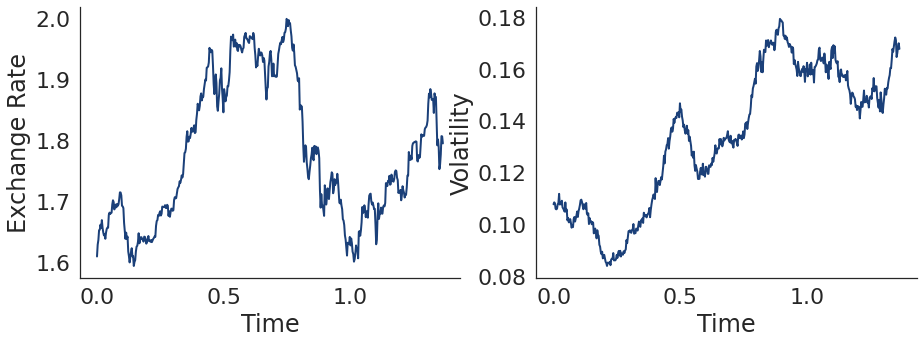

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(train_x.cpu(), train_y[1:].cpu())
# ax[0].plot(test_x, test_y, color=palette[7])
ax[0].set_ylabel("Exchange Rate")
ax[0].set_xlabel("Time")

ax[1].plot(train_x.cpu(), vol.cpu())
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Volatility")
sns.despine()